## Семинар 14
# Тема: Методы уменьшения размерности

Уменьшение размерности в машинном обучении - это уменьшение числа признаков в наборе данных. Это задача обучения без учителя.

Причины необходимости уменьшения количества признаков:

1. Улучшение обобщающей способности модели из-за удаления избыточных (зависящих от остальных признаков) и неважных (не связаных с зависимой переменной) признаков
2. Сокращение времени обучения
3. Простые модели легче интерпретировать

Задача-минимум – сократить признаковое пространство без потери качества.
Задача-максимум – сократить признаковое пространство и при этом улучшить качество модели на тестовом наборе.

Не существует одного оптимального метода отбора признаков.

## Подходы к уменьшеню размерности
Делятся на два основных:

**Отбор признаков** (feature selection)

**Выделение признаков** (feature extraction)

## Отбор признаков
Отбор признаков – это выбор подмножества признаков из имеющихся.

Существует три типа методов отбора признаков:

1. методы-фильтры (filter methods)
2. методы-обертки (wrapper methods)
3. встроенные методы (embedded methods)

Их можно комбинировать.

**Методы-фильтры** основываются только на статистиках признаков и не используют методы машинного обучения.
В их основе – следующая процедура: получение оценки каждого признака, затем ранжирование признаков по полученным оценкам и выбор признаков с наиболее высокой оценкой.

Примерами методов-фильтров может быть отбор признаков по:

1. Дисперсии (низкая оценка дисперсии может указывать на почти константный признак)
2. Критерию хи-квадрат или F-критерию (чем выше значение хи-квадрат/ F-критерий и ниже p-значение, тем переменная важнее)
3. Коэффициенту корреляции (есть корреляция с зависимой переменной – хороший признак, есть корреляция с другим признаком – избыточный признак)
4. Метрике (чем выше метрика, тем важнее признак).

И др.

**Методы-обертки** используют методы машинного обучения. В их основе – следующая процедура: находим подмножество признаков, строим модель машинного обучения и оцениваем качество, а потом повторяем с другим количеством признаков.

Примеры методов-оберток:

1. Метод прямого включения  (добавляет по одному признаку за итерацию)
2. Метод обратного исключения (исключает по одному признаку за итерацию)
3. Метод исчерпывающего поиска (перебирает все возможные комбинации признаков)

**Встроенные методы** выполняют отбор признаков в ходе обучения модели машинного обучения. В их основе – следующая процедура: обучаем модель машинного обучения, вычисляем важности признаков и удаляем неважные признаки.

Примерами встроенных методов является отбор признаков с помощью регуляризации LASSO, отбор признаков на основе
важностей на основе уменьшения неоднородности для случайного леса.

Отбор признаков – это тоже модель, либо использующая вычисление статистик признаков (в случае с методами-фильтрами), либо использующая параметры моделей машинного обучения (в случае с методами-обертками и встро-
енными методами).

## Выделение признаков

Выделение признаков – это составление меньшего количества новых признаков из исходных, максимально полно описывающих пространство исходного набора данных.

**Метод главных компонент** (англ. Principal Components Analysis, PCA) — один из основных способов уменьшить
размерность данных, потеряв наименьшее количество информации. Изобретен К.Пирсоном в 1901 г.
Вычисление главных компонент осуществляется так:
1. Вычисляется матрица ковариации признаков.
2. Отыскиваются собственные вектора и собственные числа матрицы ковариации.
3. Упорядочиваются собственные числа по убыванию. Чем больше число - тем больше дисперсия.
4. Берутся N первых собственных векторов, которые соответствуют первым N собственным числам.
Они и будут искомыми главными компонентами.

Прежде чем понижать размерность, необходимо масштабировать исходный набор данных.

Импортируем необходимые библиотеки

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

## Отбор признаков (методы-фильтры)

### 1. Загрузите прилагающийся датасет diabetes.csv. Выведите первые пять строк. Отделите целевую переменную Outcome и обозначьте её за y, а оставшиеся данные за X. Выведите их размеры.

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = data["Outcome"]
X = data.drop(columns=["Outcome"])

In [4]:
y.shape

(768,)

In [5]:
X.shape

(768, 8)

### 2. Сделайте 10-блочную перекрёстную проверку модели логистической регрессии LogisticRegression(max_iter = 1200), используя библиотечную функцию cross_val_score и выведите средние значение метрики f1-score.

In [6]:
model = LogisticRegression(max_iter = 1200)

In [7]:
scores = cross_val_score(model, X, y, cv=10, scoring="f1").mean()
scores

np.float64(0.6377596026885664)

### 3. Осуществите отбор признаков, используя класс VarianceThreshold(threshold=0.5). Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [8]:
selector = VarianceThreshold(threshold=0.5)

In [9]:
X_selected = selector.fit_transform(X)

In [10]:
X_selected

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [11]:
selector.variances_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [12]:
selector.get_feature_names_out()

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'Age'], dtype=object)

In [13]:
pd.DataFrame(X_selected, columns=selector.get_feature_names_out()).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0


In [14]:
cross_val_score(model, X_selected, y, cv=10, scoring="f1").mean()

np.float64(0.6303290985487632)

### 4. Осуществите отбор признаков, используя класс SelectKBest(score_func=chi2, k=7). Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [15]:
selector_chi2 =  SelectKBest(score_func=chi2, k=7)
selector_chi2.fit(X, y)
X_selected_chi2 = selector_chi2.transform(X)

In [16]:
selector_chi2.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [17]:
pd.Series(selector_chi2.scores_, X.columns).sort_values(ascending=False)

,0
Insulin,2175.565273
Glucose,1411.887041
Age,181.303689
BMI,127.669343
Pregnancies,111.519691
SkinThickness,53.108040
BloodPressure,17.605373
DiabetesPedigreeFunction,5.392682


In [18]:
selector_chi2.get_feature_names_out()

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'Age'], dtype=object)

In [19]:
pd.DataFrame(X_selected_chi2, columns=selector_chi2.get_feature_names_out()).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0


In [20]:
cross_val_score(model, X_selected_chi2, y, cv=10, scoring="f1").mean()

np.float64(0.6303290985487632)

### 5. Повторите тот же самый отбор и обучение модели с 10-блочной перекрёстной проверкой, что и в пункте 4, но используйте теперь Pipeline. Убедитесь, что значение метрики f1 будет то же.

In [21]:
pipeline = Pipeline([
    ('selector', VarianceThreshold(threshold=0.5)),
    ('model', LogisticRegression(max_iter = 1200))
])

In [22]:
scores = cross_val_score(pipeline, X, y, cv=10, scoring="f1").mean()
scores

np.float64(0.6303290985487632)

### 6. Осуществите отбор признаков по метрике roc_auc. Отбросьте признаки со значением этой метрики меньшей, либо равной 0.55. Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [23]:
metrics_roc = []
for i in X.columns:
  score = cross_val_score(model, X[[i]], y, cv=10, scoring="roc_auc").mean()
  metrics_roc.append(score)
metrics_roc

[np.float64(0.6224501424501424),
 np.float64(0.7888019943019944),
 np.float64(0.5873817663817663),
 np.float64(0.5532207977207977),
 np.float64(0.5383760683760684),
 np.float64(0.6901880341880341),
 np.float64(0.6056709401709401),
 np.float64(0.6873746438746438)]

In [24]:
roc_series = pd.Series(metrics_roc, X.columns).sort_values(ascending=False)
roc_series

,0
Glucose,0.788802
BMI,0.690188
Age,0.687375
Pregnancies,0.622450
DiabetesPedigreeFunction,0.605671
BloodPressure,0.587382
SkinThickness,0.553221
Insulin,0.538376


In [25]:
select_columns = roc_series.index[roc_series >= 0.55].tolist()
select_columns

['Glucose',
 'BMI',
 'Age',
 'Pregnancies',
 'DiabetesPedigreeFunction',
 'BloodPressure',
 'SkinThickness']

In [26]:
X[select_columns].head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,BloodPressure,SkinThickness
0,148,33.6,50,6,0.627,72,35
1,85,26.6,31,1,0.351,66,29
2,183,23.3,32,8,0.672,64,0
3,89,28.1,21,1,0.167,66,23
4,137,43.1,33,0,2.288,40,35


In [27]:
cross_val_score(pipeline, X[select_columns], y, cv=10, scoring="f1").mean()

np.float64(0.6391533533402245)

7. Осуществите отбор признаков, используя матрицу корреляции. Отбросьте признаки с корреляцией большей 0.5. Сделайте 7-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

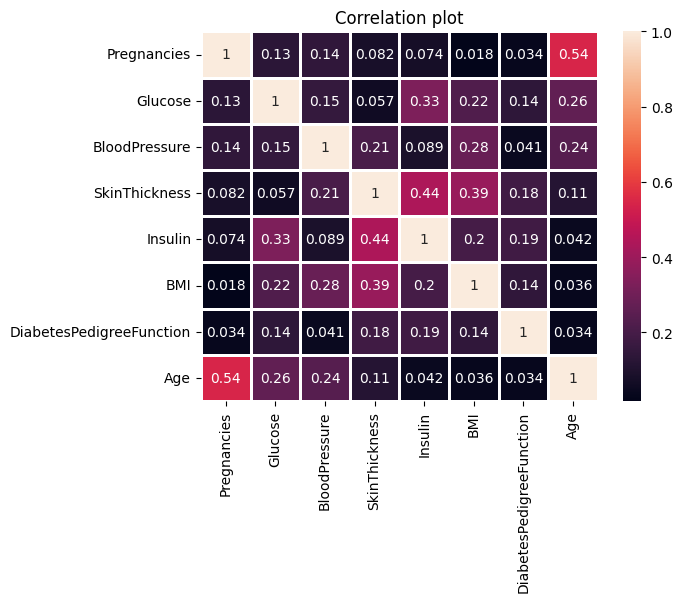

In [28]:
corr = X.corr().abs()
plt.title('Correlation plot')
sns.heatmap(corr, annot=True, fmt='.2g',linewidths=2);

In [29]:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_))
upper

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
Glucose,NaN,NaN,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,NaN,NaN,NaN,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,NaN,NaN,NaN,NaN,0.436783,0.392573,0.183928,0.113970
Insulin,NaN,NaN,NaN,NaN,NaN,0.197859,0.185071,0.042163
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.140647,0.036242
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033561
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
to_drop = [column for column in upper.columns if any(upper[column]>0.5)]
to_drop

['Age']

In [31]:
X_selected_corr = X.drop(to_drop, axis=1)
X_selected_corr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [32]:
cross_val_score(model, X_selected_corr, y, cv=10, scoring="f1").mean()

np.float64(0.6214597989942018)

###  Метод главных компонент

### 1. Загрузите встроенный датасет load_iris. Выведите информацию о его размерах. Выведите первые 5 строк в виде датафрейма. Обозначьте данные за X, а целевую переменную за y.  

In [33]:
iris = load_iris()
X = iris.data
y = iris.target

In [39]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [34]:
X.shape, y.shape

((150, 4), (150,))

In [36]:
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2. Разделите данные на обучающую и тестовую выборки в соотношении 75-25. Зафиксируйте воспроизводимость разбиения random_state = 1234. Выведите размеры полученных выборок.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1234
)

In [106]:
X_train.shape, X_test.shape

((227, 13), (76, 13))

### 3. Произведите стандартную нормализацию данных.

In [43]:
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Реализуйте модель логистической регрессии и выведите отчёт о классификации на тестовых данных.

In [46]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test_scaled)

In [51]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



### 5. Понизьте размерность данных с помощью метода главных компонент PCA(n_components=2) до двух.

In [52]:
pca = PCA(n_components=2, random_state=1234)

In [53]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### 7. Визуализируйте полученные данные на диаграмме рассеяния, подкрасив классы. Сделайте вывод о том все ли классы являются линейно разделимыми.

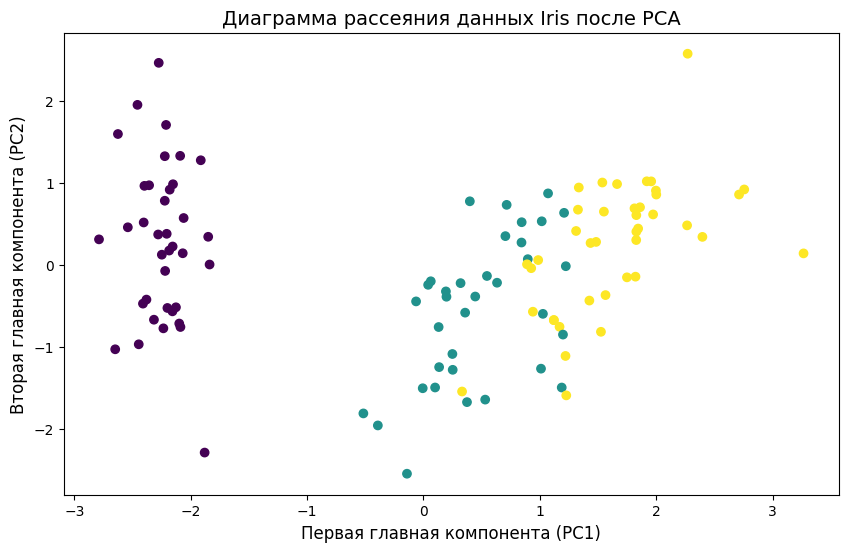

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train
)
plt.xlabel('Первая главная компонента (PC1)', fontsize=12)
plt.ylabel('Вторая главная компонента (PC2)', fontsize=12)
plt.title('Диаграмма рассеяния данных Iris после PCA', fontsize=14)

plt.show()

### 8. Обучите заново модель логистической регрессии и оцените ее обучающую способность по отчёту о классификации. Сделайте вывод об эффективности редукции признаков в данном случае.  

In [56]:
model_pca = LogisticRegression(random_state=1234, max_iter=1000)
model_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, random_state=1234)

In [57]:
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

In [59]:
print(classification_report(y_train, y_train_pred_pca, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        37
  versicolor       0.85      0.80      0.82        35
   virginica       0.83      0.88      0.85        40

    accuracy                           0.89       112
   macro avg       0.89      0.89      0.89       112
weighted avg       0.89      0.89      0.89       112



In [60]:
print(classification_report(y_test, y_test_pred_pca, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.87      0.93        15
   virginica       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



# Задания для самостоятельного выполнения:

## Отбор признаков (методы-фильтры)

1. Загрузите прилагающийся датасет titanic.csv. Обозначьте данные за X, а целевую переменную Survived за y и выведите их размеры.
2. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии и выведите средние значение метрики accuracy.
3. Осуществите отбор признаков, используя класс VarianceThreshold(threshold=0.1). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из предыдущего пункта и сделайте вывод о том эффективно ли был проведён отбор признаков.
4. Повторите тот же самый отбор и обучение модели с 3-блочной перекрёстной проверкой, что и в пункте 4, но используйте теперь Pipeline. Убедитесь, что значение метрики будет то же.
5. Осуществите отбор признаков, используя класс SelectKBest(score_func=chi2, k=9). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 2 и сделайте вывод о том эффективно ли был проведён отбор признаков.
6. Осуществите отбор признаков по метрике roc_auc. Отбросьте признаки со значением этой метрики меньшей, либо равной 0.49. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy.
7. Осуществите отбор признаков, используя матрицу корреляции. Отбросьте признаки с корреляцией большей 0.5.  Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 3 и сделайте вывод о том эффективно ли был проведён отбор признаков.

1. Загрузите прилагающийся датасет titanic.csv. Обозначьте данные за X, а целевую переменную Survived за y и выведите их размеры.

In [61]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [64]:
y = titanic_df['Survived']
X = titanic_df.drop(['Survived'], axis=1)
X.shape, y.shape

((891, 10), (891,))

2. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии и выведите средние значение метрики accuracy.

In [71]:
model = LogisticRegression(max_iter = 2000)

In [72]:
scores = cross_val_score(model, X, y, cv=3, scoring="accuracy").mean()
scores

np.float64(0.7912457912457912)

3. Осуществите отбор признаков, используя класс VarianceThreshold(threshold=0.1). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из предыдущего пункта и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [73]:
selector = VarianceThreshold(threshold=0.1)

In [74]:
X_selected = selector.fit_transform(X)

In [75]:
X_selected

array([[  1.    ,   3.    ,   0.    , ...,   7.25  ,   0.    ,   1.    ],
       [  2.    ,   1.    ,   1.    , ...,  71.2833,   1.    ,   0.    ],
       [  3.    ,   3.    ,   1.    , ...,   7.925 ,   0.    ,   1.    ],
       ...,
       [889.    ,   3.    ,   1.    , ...,  23.45  ,   0.    ,   1.    ],
       [890.    ,   1.    ,   0.    , ...,  30.    ,   1.    ,   0.    ],
       [891.    ,   3.    ,   0.    , ...,   7.75  ,   0.    ,   0.    ]])

In [76]:
selector.variances_

array([6.61566667e+04, 6.98230591e-01, 2.28218083e-01, 1.68940473e+02,
       1.21467827e+00, 6.48999031e-01, 2.46666531e+03, 1.53000261e-01,
       7.89513794e-02, 1.99362373e-01])

In [77]:
selector.get_feature_names_out()

array(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_S'], dtype=object)

In [78]:
pd.DataFrame(X_selected, columns=selector.get_feature_names_out()).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,1.0,3.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0
4,5.0,3.0,0.0,35.0,0.0,0.0,8.0500,0.0,1.0


In [79]:
cross_val_score(model, X_selected, y, cv=3, scoring="accuracy").mean()

np.float64(0.7912457912457912)

4.
Повторите тот же самый отбор и обучение модели с 3-блочной перекрёстной проверкой, что и в пункте 4, но используйте теперь Pipeline. Убедитесь, что значение метрики будет то же.

In [80]:
pipeline = Pipeline([
    ('selector', VarianceThreshold(threshold=0.1)),
    ('model', LogisticRegression(max_iter = 2000))
])

In [81]:
scores = cross_val_score(pipeline, X, y, cv=3, scoring="accuracy").mean()
scores

np.float64(0.7912457912457912)

5. Осуществите отбор признаков, используя класс SelectKBest(score_func=chi2, k=9). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 2 и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [83]:
selector_chi2 =  SelectKBest(score_func=chi2, k=9)
selector_chi2.fit(X, y)
X_selected_chi2 = selector_chi2.transform(X)

In [84]:
selector_chi2.scores_

array([3.31293407e+00, 3.08736994e+01, 1.70348127e+02, 2.34174869e+01,
       2.58186538e+00, 1.00974991e+01, 4.51831909e+03, 2.04644013e+01,
       1.08467891e-02, 5.48920482e+00])

In [85]:
pd.Series(selector_chi2.scores_, X.columns).sort_values(ascending=False)

,0
Fare,4518.319091
Sex,170.348127
Pclass,30.873699
Age,23.417487
Embarked_C,20.464401
Parch,10.097499
Embarked_S,5.489205
PassengerId,3.312934
SibSp,2.581865
Embarked_Q,0.010847


In [86]:
selector_chi2.get_feature_names_out()

array(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_S'], dtype=object)

In [87]:
pd.DataFrame(X_selected_chi2, columns=selector_chi2.get_feature_names_out()).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,1.0,3.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0
4,5.0,3.0,0.0,35.0,0.0,0.0,8.0500,0.0,1.0


In [89]:
cross_val_score(model, X_selected_chi2, y, cv=3, scoring="accuracy").mean()

np.float64(0.7912457912457912)

6. Осуществите отбор признаков по метрике roc_auc. Отбросьте признаки со значением этой метрики меньшей, либо равной 0.49. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy.

In [90]:
metrics_roc = []
for i in X.columns:
  score = cross_val_score(model, X[[i]], y, cv=3, scoring="roc_auc").mean()
  metrics_roc.append(score)
metrics_roc

[np.float64(0.4603265906113188),
 np.float64(0.681150736586457),
 np.float64(0.7668727830505224),
 np.float64(0.5206116383855814),
 np.float64(0.456180295912824),
 np.float64(0.561283673665037),
 np.float64(0.6900824465535423),
 np.float64(0.56765890135174),
 np.float64(0.47866935097306107),
 np.float64(0.5687134502923976)]

In [91]:
roc_series = pd.Series(metrics_roc, X.columns).sort_values(ascending=False)
roc_series

,0
Sex,0.766873
Fare,0.690082
Pclass,0.681151
Embarked_S,0.568713
Embarked_C,0.567659
Parch,0.561284
Age,0.520612
Embarked_Q,0.478669
PassengerId,0.460327
SibSp,0.456180


In [92]:
select_columns = roc_series.index[roc_series >= 0.49].tolist()
select_columns

['Sex', 'Fare', 'Pclass', 'Embarked_S', 'Embarked_C', 'Parch', 'Age']

In [93]:
X[select_columns].head()

,Sex,Fare,Pclass,Embarked_S,Embarked_C,Parch,Age
0,0,7.2500,3,1,0,0,22.0
1,1,71.2833,1,0,1,0,38.0
2,1,7.9250,3,1,0,0,26.0
3,1,53.1000,1,1,0,0,35.0
4,0,8.0500,3,1,0,0,35.0


In [95]:
cross_val_score(pipeline, X[select_columns], y, cv=3, scoring="accuracy").mean()

np.float64(0.7856341189674523)

7. Осуществите отбор признаков, используя матрицу корреляции. Отбросьте признаки с корреляцией большей 0.5. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 3 и сделайте вывод о том эффективно ли был проведён отбор признаков.

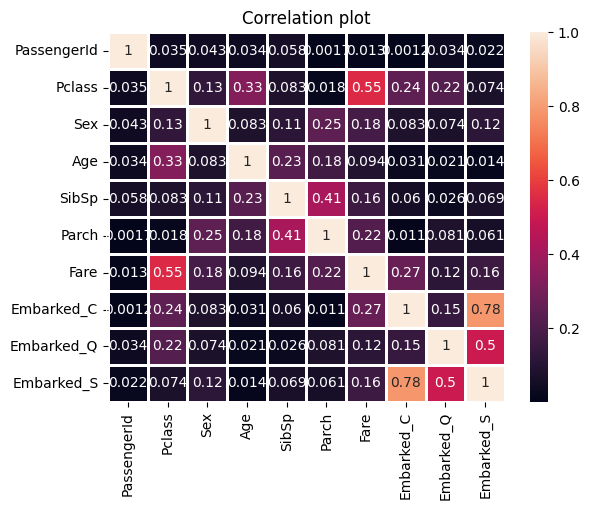

In [96]:
corr = X.corr().abs()
plt.title('Correlation plot')
sns.heatmap(corr, annot=True, fmt='.2g',linewidths=2);

In [97]:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_))
upper

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,NaN,0.035144,0.042939,0.033632,0.057527,0.001652,0.012658,0.001205,0.033606,0.022204
Pclass,NaN,NaN,0.131900,0.334974,0.083081,0.018443,0.549500,0.243292,0.221009,0.074053
Sex,NaN,NaN,NaN,0.082949,0.114631,0.245489,0.182333,0.082853,0.074115,0.119224
Age,NaN,NaN,NaN,NaN,0.232978,0.176486,0.093706,0.031303,0.021093,0.014149
SibSp,NaN,NaN,NaN,NaN,NaN,0.414838,0.159651,0.059528,0.026354,0.068734
Parch,NaN,NaN,NaN,NaN,NaN,NaN,0.216225,0.011069,0.081228,0.060814
Fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269335,0.117216,0.162184
Embarked_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148258,0.782742
Embarked_Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499421
Embarked_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
to_drop = [column for column in upper.columns if any(upper[column]>0.5)]
to_drop

['Fare', 'Embarked_S']

In [99]:
X_selected_corr = X.drop(to_drop, axis=1)
X_selected_corr.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,1,3,0,22.0,1,0,0,0
1,2,1,1,38.0,1,0,1,0
2,3,3,1,26.0,0,0,0,0
3,4,1,1,35.0,1,0,0,0
4,5,3,0,35.0,0,0,0,0


In [100]:
cross_val_score(model, X_selected_corr, y, cv=3, scoring="accuracy").mean()

np.float64(0.7912457912457912)

## Метод главных компонент

1. Загрузите прилагающийся датасет heart.csv.
2. Обозначьте данные за X, а целевую переменную output за y и выведите их размеры.
3. Разделите данные на обучающую и тестовую выборки в соотношении 85-15. Зафиксируйте воспроизводимость разбиения random_state = 15. Выведите размеры полученных выборок.
4. Произведите стандартную нормализацию данных и реализуйте модель логистической регрессии. Оцените качество с помощью метрики f1 на тестовых данных.
5. Понизьте размерность данных с помощью метода главных компонент сначала до одной компоненты, потом до двух и так далее. Каждый раз обучайте заново модель логистической регресии и находите метрику f1.  
6. Постройте график зависимости значений метрики f1 от размерности данных. Сделайте вывод о том, какую размерность следует выбрать.

1. Загрузите прилагающийся датасет heart.csv.

In [101]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


2. Обозначьте данные за X, а целевую переменную output за y и выведите их размеры.

In [102]:
y = data["output"]
X = data.drop(columns=["output"])

In [103]:
y.shape

(303,)

In [104]:
X.shape

(303, 13)

3. Разделите данные на обучающую и тестовую выборки в соотношении 85-15. Зафиксируйте воспроизводимость разбиения random_state = 15. Выведите размеры полученных выборок.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=15
)

In [108]:
X_train.shape, X_test.shape

((257, 13), (46, 13))

4. Произведите стандартную нормализацию данных и реализуйте модель логистической регрессии. Оцените качество с помощью метрики f1 на тестовых данных.

In [109]:
scaler = StandardScaler()

In [110]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:
y_pred = model.predict(X_test_scaled)

In [115]:
metrics.f1_score(y_test, y_pred)

0.8

5.
Понизьте размерность данных с помощью метода главных компонент сначала до одной компоненты, потом до двух и так далее. Каждый раз обучайте заново модель логистической регресии и находите метрику f1.

In [118]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

max_components = min(X_scaled.shape[1], 10)
f1_scores = []

for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.15, random_state=15
    )

    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"n_components = {n_components}, F1-score = {f1:.4f}")


n_components = 1, F1-score = 0.8636
n_components = 2, F1-score = 0.8182
n_components = 3, F1-score = 0.8372
n_components = 4, F1-score = 0.7727
n_components = 5, F1-score = 0.7727
n_components = 6, F1-score = 0.7727
n_components = 7, F1-score = 0.7727
n_components = 8, F1-score = 0.7727
n_components = 9, F1-score = 0.8182
n_components = 10, F1-score = 0.8182


6. Постройте график зависимости значений метрики f1 от размерности данных. Сделайте вывод о том, какую размерность следует выбрать.

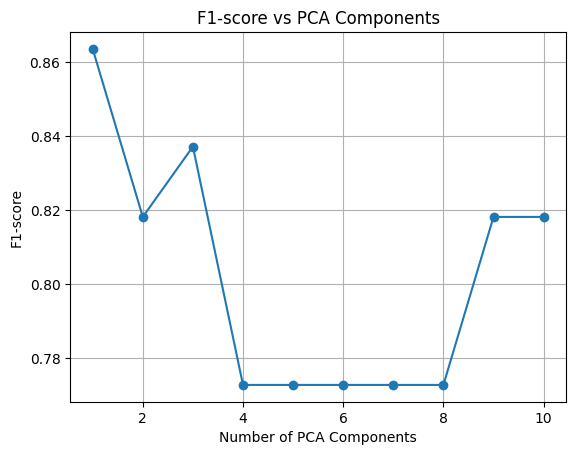

In [119]:
plt.plot(range(1, max_components + 1), f1_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('F1-score')
plt.title('F1-score vs PCA Components')
plt.grid()
plt.show()